In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Lecture/情報理工学実験1/2024/

/content/drive/MyDrive/Lecture/情報理工学実験1/2024


# 課題 7.24

In [13]:
Xs = np.loadtxt('20.data', delimiter=' ', usecols=0)
Ys = np.loadtxt('20.data', delimiter=' ', usecols=1)
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.5)

regularization = 0.0001

def real_func(x):
  return np.sin(2 * np.pi * x)

def fit_func(p, x):
  f = np.poly1d(p)
  return f(x)

def residuals_func_regularization(p, x, y):
  ret = fit_func(p, x) - y
  ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))
  return ret

def fitting(M=0):
  p_init = np.random.rand(M + 1)
  p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x_train, y_train))
  return p_lsq_regularization

p_lsq_regularization = fitting(M=9)

# 課題 7.25

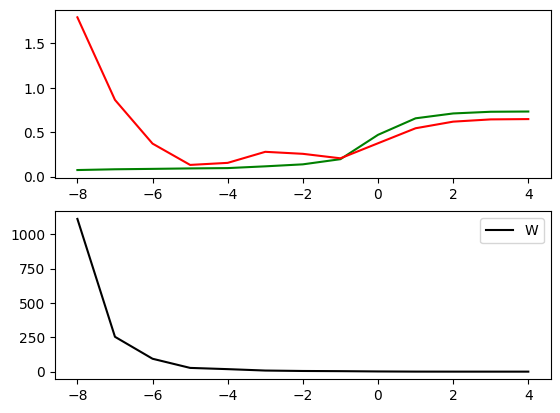

In [14]:
Reg = list(range(-8,5))
RMSE_test = []
RMSE_train = []
W = []

for reg in Reg:
  regularization = pow(10, reg)
  p_lsq_regularization = fitting(M=9)
  y_train_pred = fit_func(p_lsq_regularization[0], x_train)
  RMSE_train.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
  y_test_pred = fit_func(p_lsq_regularization[0], x_test)
  RMSE_test.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  W.append(math.sqrt(np.sum(p_lsq_regularization[0]**2)))

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)
plt.sca(ax1)
plt.plot(Reg, RMSE_train, color='green')
plt.plot(Reg, RMSE_test, color='red')
plt.sca(ax2)
plt.plot(Reg, W, color='black', label='W')
plt.legend()

In [15]:
RMSE_test = [1, 2, 3]
print(type(RMSE_test))

<class 'list'>


# 課題 7.26

[0.19075324454307502, 0.16713684681595437, 0.1555599346995475, 0.1466225453286381, 0.14320375964418092, 0.14674176764254554, 0.15251454497721637, 0.1583372367728803, 0.19073382350756082, 0.23268926018704783, 0.2710861191565994, 0.3043399802055975, 0.3326872155135646]


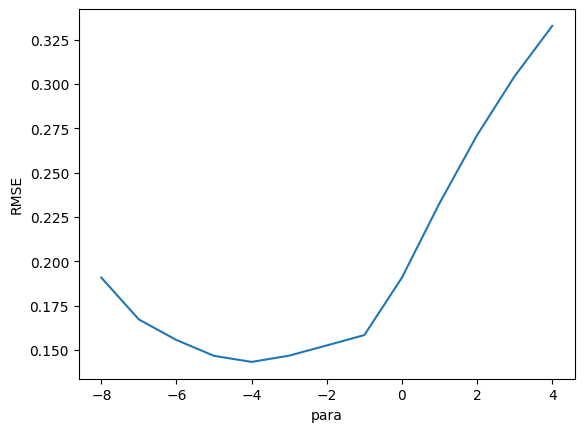

In [17]:
rms = []
RMSE_test = []
kf = KFold(n_splits=5)
Reg = list(range(-8,5))

for reg in Reg:
  regularization = pow(10, reg)
  for train_index, test_index in kf.split(Xs, Ys):
    x_train, x_test = Xs[train_index], Xs[test_index]
    y_train, y_test = Ys[train_index], Ys[test_index]
    p_lsq_regularization = fitting(M=9)
    y_test_pred = fit_func(p_lsq_regularization[0], x_test)
    rms.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  poly_rmse = np.mean(rms)
  RMSE_test.append(poly_rmse)
print(RMSE_test)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Reg, RMSE_test)
ax.set_xlabel('para')
ax.set_ylabel('RMSE')
plt.show()

# 課題 7.27

reg = -8, RMSE = 0.19
reg = -7, RMSE = 0.17
reg = -6, RMSE = 0.16
reg = -5, RMSE = 0.15
reg = -4, RMSE = 0.14
reg = -3, RMSE = 0.15
reg = -2, RMSE = 0.15
reg = -1, RMSE = 0.16
reg = 0, RMSE = 0.19
reg = 1, RMSE = 0.23
reg = 2, RMSE = 0.27
reg = 3, RMSE = 0.30
reg = 4, RMSE = 0.33
[0.19074328671603988, 0.1671333241837074, 0.15555788981976187, 0.14662117422589432, 0.14320230132001685, 0.1467405596463096, 0.15251351425190598, 0.1583363345922586, 0.1907330161557006, 0.2326885335092116, 0.2710854584610404, 0.3043393745621244, 0.33268665625237015]


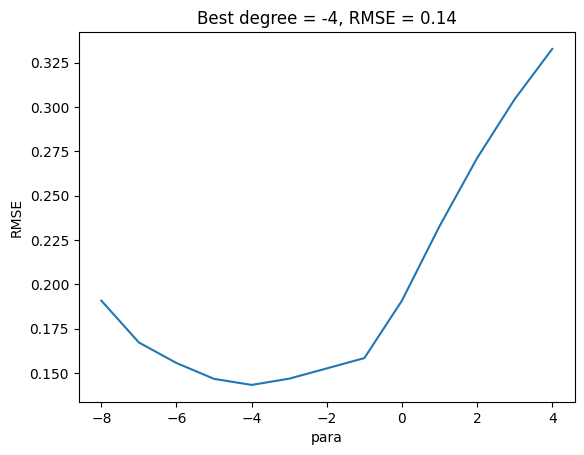

In [18]:
rms = []
RMSE_test = []
kf = KFold(n_splits=5)
Reg = list(range(-8,5))
min_rmse, min_reg = 1e10, 0

for reg in Reg:
  regularization = pow(10, reg)
  for train_index, test_index in kf.split(Xs, Ys):
    x_train, x_test = Xs[train_index], Xs[test_index]
    y_train, y_test = Ys[train_index], Ys[test_index]
    p_lsq_regularization = fitting(M=9)
    y_test_pred = fit_func(p_lsq_regularization[0], x_test)
    rms.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
  poly_rmse = np.mean(rms)
  RMSE_test.append(poly_rmse)

  if min_rmse > poly_rmse:
    min_rmse = poly_rmse
    min_deg = reg
  print(f"reg = {reg}, RMSE = {poly_rmse:.2f}")
print(RMSE_test)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Reg, RMSE_test)
ax.set_xlabel('para')
ax.set_ylabel('RMSE')
ax.set_title(f"Best degree = {min_deg}, RMSE = {min_rmse:.2f}")
plt.show()

# 課題 7.28

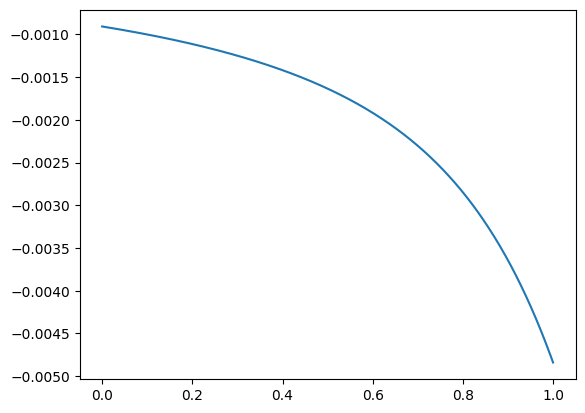

In [19]:
Xs = np.loadtxt('20.data', delimiter=' ', usecols=0)
Ys = np.loadtxt('20.data', delimiter=' ', usecols=1)

regulalization = pow(10, -4)
p_lsq_regularization = fitting(M=9)
x_points = np.linspace(0, 1, 1000)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.show()